In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# enable imports from parent directory
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from src.utils.loaders import read_data

## Plot styling defaults (Matplotlib & Seaborn)

In [2]:
sns.set_style("dark")
# Create an array with the colors you want to use
faceit_colors = ["#ff5500", "#181818"]
# Set your custom color palette
sns.set_palette(sns.color_palette(faceit_colors))

plt.rcParams["axes.facecolor"] = "#2D3441"
plt.rcParams["figure.facecolor"] = "#1f1f1f"
plt.rcParams["text.color"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["legend.facecolor"] = "#565c66"
plt.rcParams["legend.edgecolor"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["axes.labelsize"] = "13"
plt.rcParams["axes.titlesize"] = "20"

# Load Data

In [16]:
fields = ["_id", 'mapPlayed']

df = pd.read_csv('../data/interim/batch_1.csv', usecols=fields)

df.head()

,_id,mapPlayed
0,1-1bdfcee1-a301-4f18-903d-3abffcb3e93e,de_mirage
1,1-1be0d5d3-6bd7-46d0-b7b9-4035a723cf26,de_mirage
2,1-1be18f36-f42b-4908-95fc-7f14a0837b76,de_vertigo
3,1-1be272f3-7bd7-4e31-bd62-7cb5f738f9c1,de_mirage
4,1-1be293d3-809b-4043-ae22-b54ec6f55cd5,de_dust2


In [3]:
data = read_data("processed", read_all=False)

In [4]:
data.head()

,_id,winner,match_mean_elo,binned_match_elo,5v5_free_queue,5v5_premium_queue,dif_mean_elo,dif_stddev_elo,dif_num_paid_memberships,dif_num_solo_players,...,dif_mean_dif_rounds_prev,dif_mean_dif_elo_prev,dif_mean_matches_afk,dif_num_played_togthr_prev,dif_winrate_togthr_prev,dif_mean_first_matches_on_day,dif_mean_matches_on_day,dif_mean_played_map_on_day,entity_dummies_hub,entity_dummies_matchmaking
0,1-1bdfcee1-a301-4f18-903d-3abffcb3e93e,0,1936.3,6,1,0,0.6,-119.804908,3,2,...,0.86,-67.600,0.0,-0.20,-0.200000,1,-0.4,-0.2,0,1
1,1-1be0d5d3-6bd7-46d0-b7b9-4035a723cf26,0,2239.4,8,0,1,-50.4,-62.286294,0,-1,...,0.42,-32.948,0.0,0.34,-0.440000,0,1.0,0.4,0,1
2,1-1be18f36-f42b-4908-95fc-7f14a0837b76,1,2136.3,7,1,0,-326.2,-846.109653,0,4,...,2.52,-233.912,0.0,-0.72,-0.666667,0,-1.2,0.0,0,1
3,1-1be272f3-7bd7-4e31-bd62-7cb5f738f9c1,1,1954.4,6,0,1,8.8,-92.685928,0,0,...,2.28,-44.396,0.0,0.36,0.333333,3,-1.8,-0.6,0,1
4,1-1be293d3-809b-4043-ae22-b54ec6f55cd5,0,1947.7,6,1,0,0.2,52.748499,0,-2,...,-0.66,87.736,0.0,0.00,0.000000,1,0.0,0.4,0,1


In [11]:
data.groupby("winner").mean()

,match_mean_elo,binned_match_elo,5v5_free_queue,5v5_premium_queue,dif_mean_elo,dif_stddev_elo,dif_num_paid_memberships,dif_num_solo_players,dif_num_parties,dif_mean_matches,...,dif_mean_dif_rounds_prev,dif_mean_dif_elo_prev,dif_mean_matches_afk,dif_num_played_togthr_prev,dif_winrate_togthr_prev,dif_mean_first_matches_on_day,dif_mean_matches_on_day,dif_mean_played_map_on_day,entity_dummies_hub,entity_dummies_matchmaking
winner,,,,,,,,,,,,,,,,,,,,,
0,2059.127254,6.539959,0.639344,0.300205,36.013525,22.491350,0.101434,-0.104508,-0.064549,68.279713,...,-0.036025,9.492328,0.0,0.007664,0.054944,-0.025615,0.019467,0.022746,0.053279,0.939549
1,2061.714732,6.545366,0.632195,0.288780,-27.525073,-23.050732,-0.072195,-0.092683,-0.010732,-17.207805,...,0.051161,-14.500940,0.0,0.007922,0.004353,0.078049,-0.015415,-0.015220,0.078049,0.920976


# Visualization

In [9]:
def comp_featured_based_on_winner(data, feature, num_bins=30, title=None):
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(
        data,
        x=feature, hue="winner",
        hue_order=[0,1],
        multiple="fill",
        legend="A",
        bins=num_bins)
    
    ax.set_title(title)
    handles = ax.get_legend().legendHandles
    ax.legend(handles, ['A','B'], title="Winner team")

    print(data.groupby("winner").mean()[feature])
    return ax

winner
0    36.013525
1   -27.525073
Name: dif_mean_elo, dtype: float64


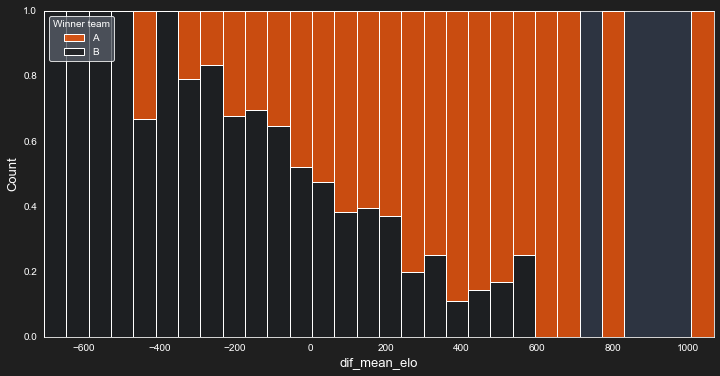

In [10]:
ax = comp_featured_based_on_winner(data, "dif_mean_elo");